# Gold Price Prediction using Random Forest Regressor

In [2]:
!git status
!git add .
!git commit -m "Gold Price Prediction Initiated"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/Gold Price Prediction-checkpoint.ipynb
	Datasets/gld_price_data.csv
	Gold Price Prediction.ipynb

nothing added to commit but untracked files present (use "git add" to track)


[main 9f2f1e0] Gold Price Prediction Initiated
 3 files changed, 2433 insertions(+)
 create mode 100644 .ipynb_checkpoints/Gold Price Prediction-checkpoint.ipynb
 create mode 100644 Datasets/gld_price_data.csv
 create mode 100644 Gold Price Prediction.ipynb


To github.com:DurishettyAnirudh/Machine-Learning.git
   d808adf..9f2f1e0  main -> main


### Importing the Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

### Data collection and processing

In [49]:
gold_data = pd.read_csv("Datasets/gld_price_data.csv")
print(gold_data.shape)
gold_data.head()

(2290, 6)


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [50]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [51]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [52]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [53]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [54]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


##### Correlation:
1. Positive Correlation
2. Negative Correlation

In [57]:
correlation = gold_data.corr(numeric_only = True)

In [58]:
correlation.head()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

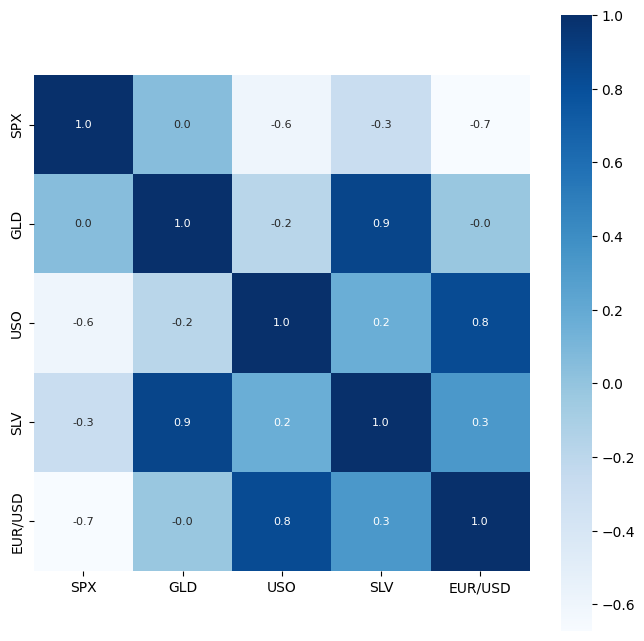

In [66]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [67]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

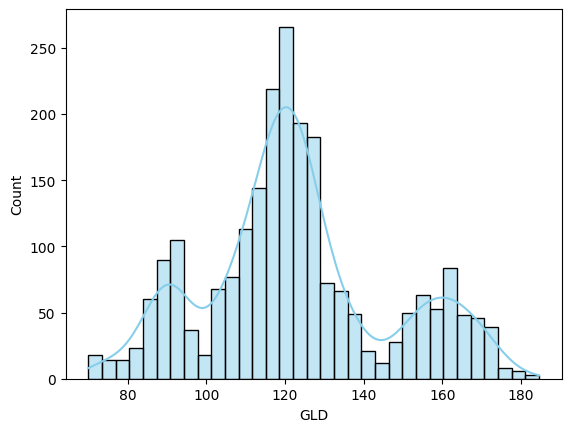

In [78]:
sns.histplot(gold_data['GLD'], color = 'skyblue', kde = True)

C:\Users\aniru\AppData\Local\Temp\ipykernel_12952\1396964618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'skyblue') # You can use histplot with kde on it or you can use this


<Axes: xlabel='GLD', ylabel='Density'>

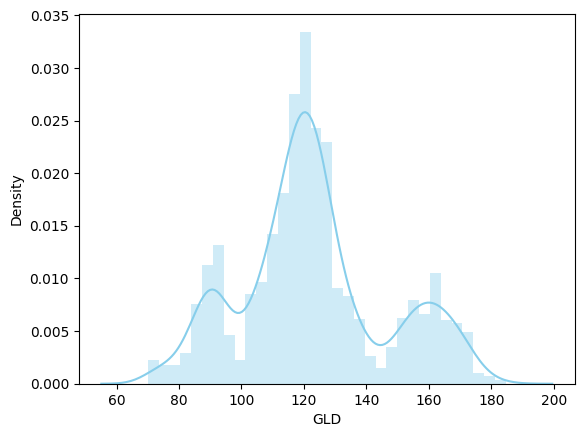

In [80]:
sns.distplot(gold_data['GLD'], color = 'skyblue') # You can use histplot with kde on it or you can use this

### Feature selection and Target Selection

In [84]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)  # axis = 1 representing column
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [86]:
y = gold_data['GLD']
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

### Train test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2061, 4) (229, 4) (2061,) (229,)


### Model Training

In [92]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
y_prediction = regressor.predict(X_test)
print(y_prediction)

[164.70599987 127.5735992  124.21929978 119.60599905 125.87349951
  85.85320045 171.79370144 137.79079905 106.92200069 132.58890197
 120.59449917 124.83320056 143.95059879 104.5128999   80.79979933
 118.59369993 140.17999889  90.2162006   91.5492998  128.27880222
 125.75949929 147.72949938 116.78340193 153.02389876 129.5230991
 130.20600082 118.82200029 111.34860057 169.48120132 156.96489834
 126.04120156 154.22900177 127.17390055 122.75669797 116.52820098
 154.55339984 115.24890029 120.47210134 103.65800176 105.58760063
 134.82399984  85.95770024 156.15020086 121.10680004 122.20500117
 155.41290011 120.20950004 116.47920031 168.39390168 116.09700008
 138.79410069 162.07719857 157.98770003 153.46520124 124.20270017
 116.41589961 167.15890081 116.65599904 165.69240079  85.04370042
 121.38199891 122.10230016 119.87300034 171.93549862 119.49349889
 180.69619574 161.52160267 138.69150192 115.74980067  92.52660124
 171.92559999 117.60989942 118.18219832 125.46600017 146.93289994
  91.373400

### Model Evaluation

In [96]:
# R-squared error
error_score = metrics.r2_score(y_test, y_prediction)
print("R-Squared error: ", error_score)

R-Squared error:  0.9870912655505552
